MAJOR PROJECT

Prediction of total score of IPL match with the use of gicen dataset
                                                                                        Submitted by:
                                                                                                Nandhakishore C S
                                                                                                genetistkishore@gmail.com

Approach:
    1. The dataset is imported and cleaned. 
    2. Repeated elelments are replaced with unique elements and the unnecessary columns are dropped.
    3. The object columns are converted into numerical columns by factorise function in Pandas. 
    4. Correraltion and Scatter plots are used to visulaise the relation between the columns for a better understanding. 
    5. Function is splitted into train and test.
    6. Random Forrest Regression model is applied to the total column.
    7. The total score is predicted and the accuracy score is checked. 
    8. For a new dataset with one row, the model is applied and the error is checked. 

In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
#Importing Dataset
dataset=pd.read_csv("ipl2017.csv")

In [3]:
dataset.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [4]:
#viewing the dataset's information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
#the data types present in data set
dataset.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
#searching for null values in the dataset
dataset.isnull().values.any()
dataset.isnull().sum()


mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

No null values present

As the date on which match happened doesnt have any relation to the total score it is droped.

In [7]:
#deletion of date column
del dataset['date']

In [8]:
#checking for unique elements in the columns and replacing it .
dataset['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
dataset=dataset.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [11]:
dataset['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

Converting the object(string) columns into numerical column using factorise function in Pandas

In [12]:
dataset['bat_team']=pd.factorize(dataset['bat_team'])[0]
dataset['bowl_team']=pd.factorize(dataset['bowl_team'])[0]
dataset['bowler']=pd.factorize(dataset['bowler'])[0]
dataset['batsman']=pd.factorize(dataset['batsman'])[0]
dataset['venue']=pd.factorize(dataset['venue'])[0]


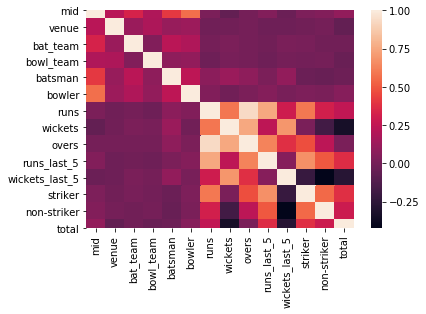

In [13]:
#plotting of correlation map to know the relation beetween columns
sns.heatmap(dataset.corr())

Plotting scatter plots to relate the players in the match to find the total

Text(0.5, 1.0, 'Relation between Bowling team and Venue')

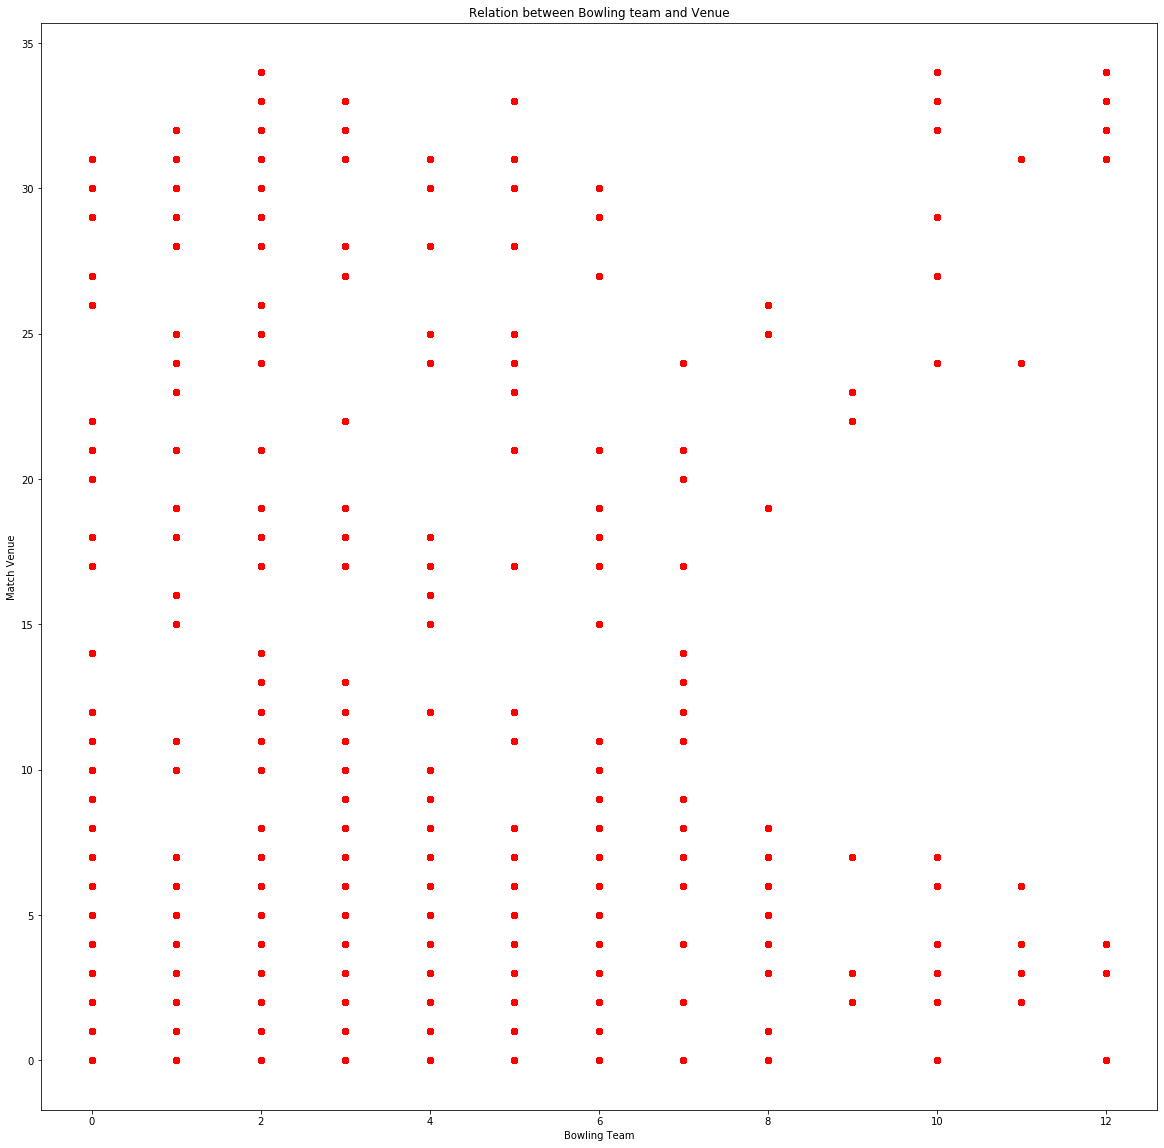

In [14]:
plt.figure(figsize=(20,20))
plt.scatter(dataset['bowl_team'],dataset['venue'],color='red')
plt.xlabel('Bowling Team')
plt.ylabel('Match Venue')
plt.title('Relation between Bowling team and Venue')


Text(0.5, 1.0, 'Relation between Batting team and venue')

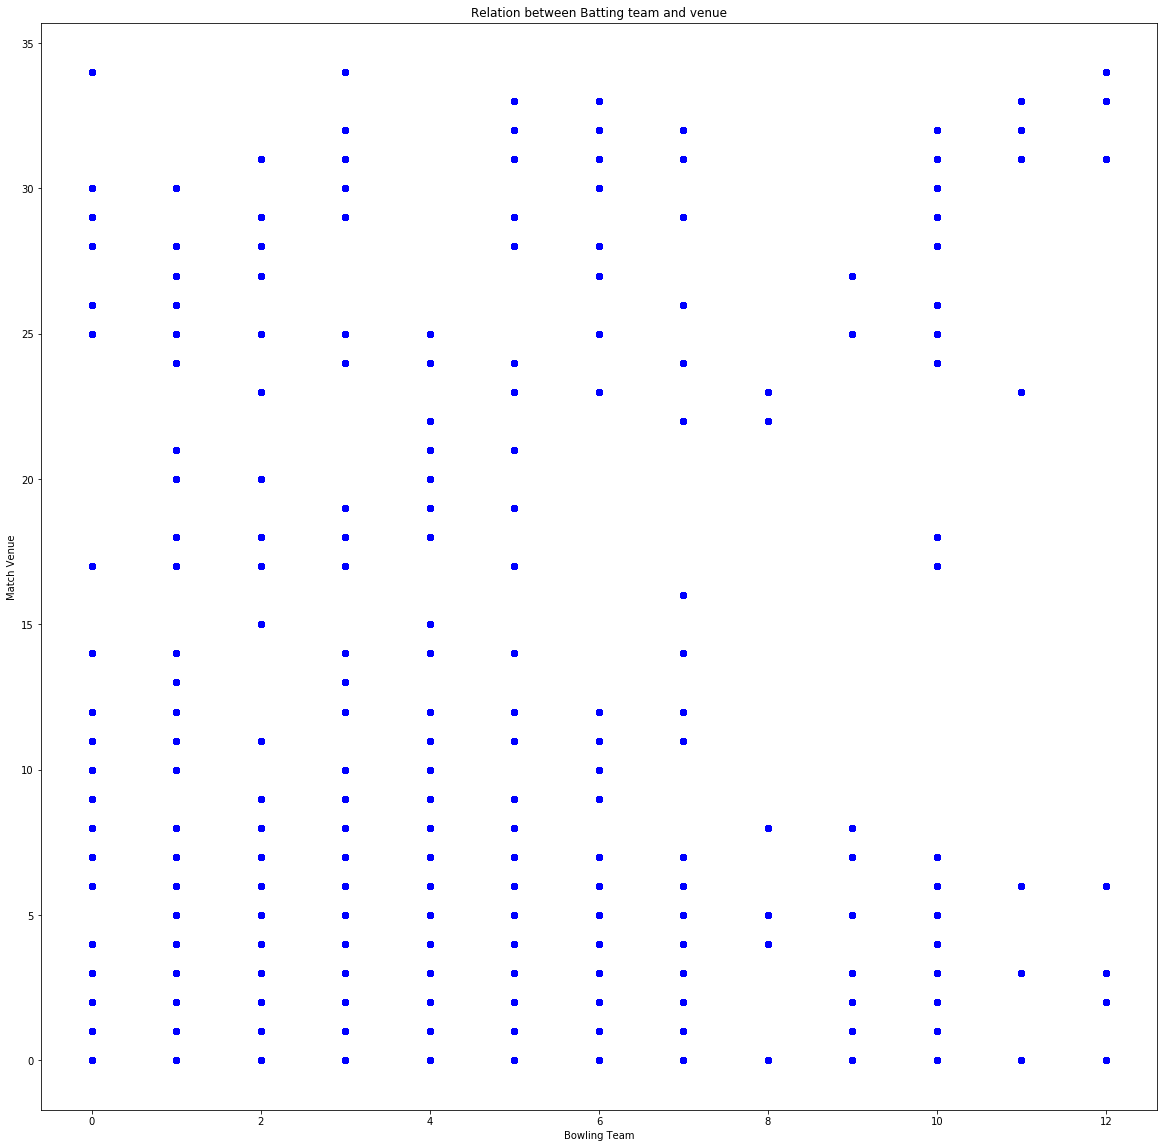

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(dataset['bat_team'],dataset['venue'],color='blue')
plt.xlabel('Bowling Team')
plt.ylabel('Match Venue')
plt.title('Relation between Batting team and venue')

Text(0.5, 1.0, 'Relation between the Bowlers and Batsman')

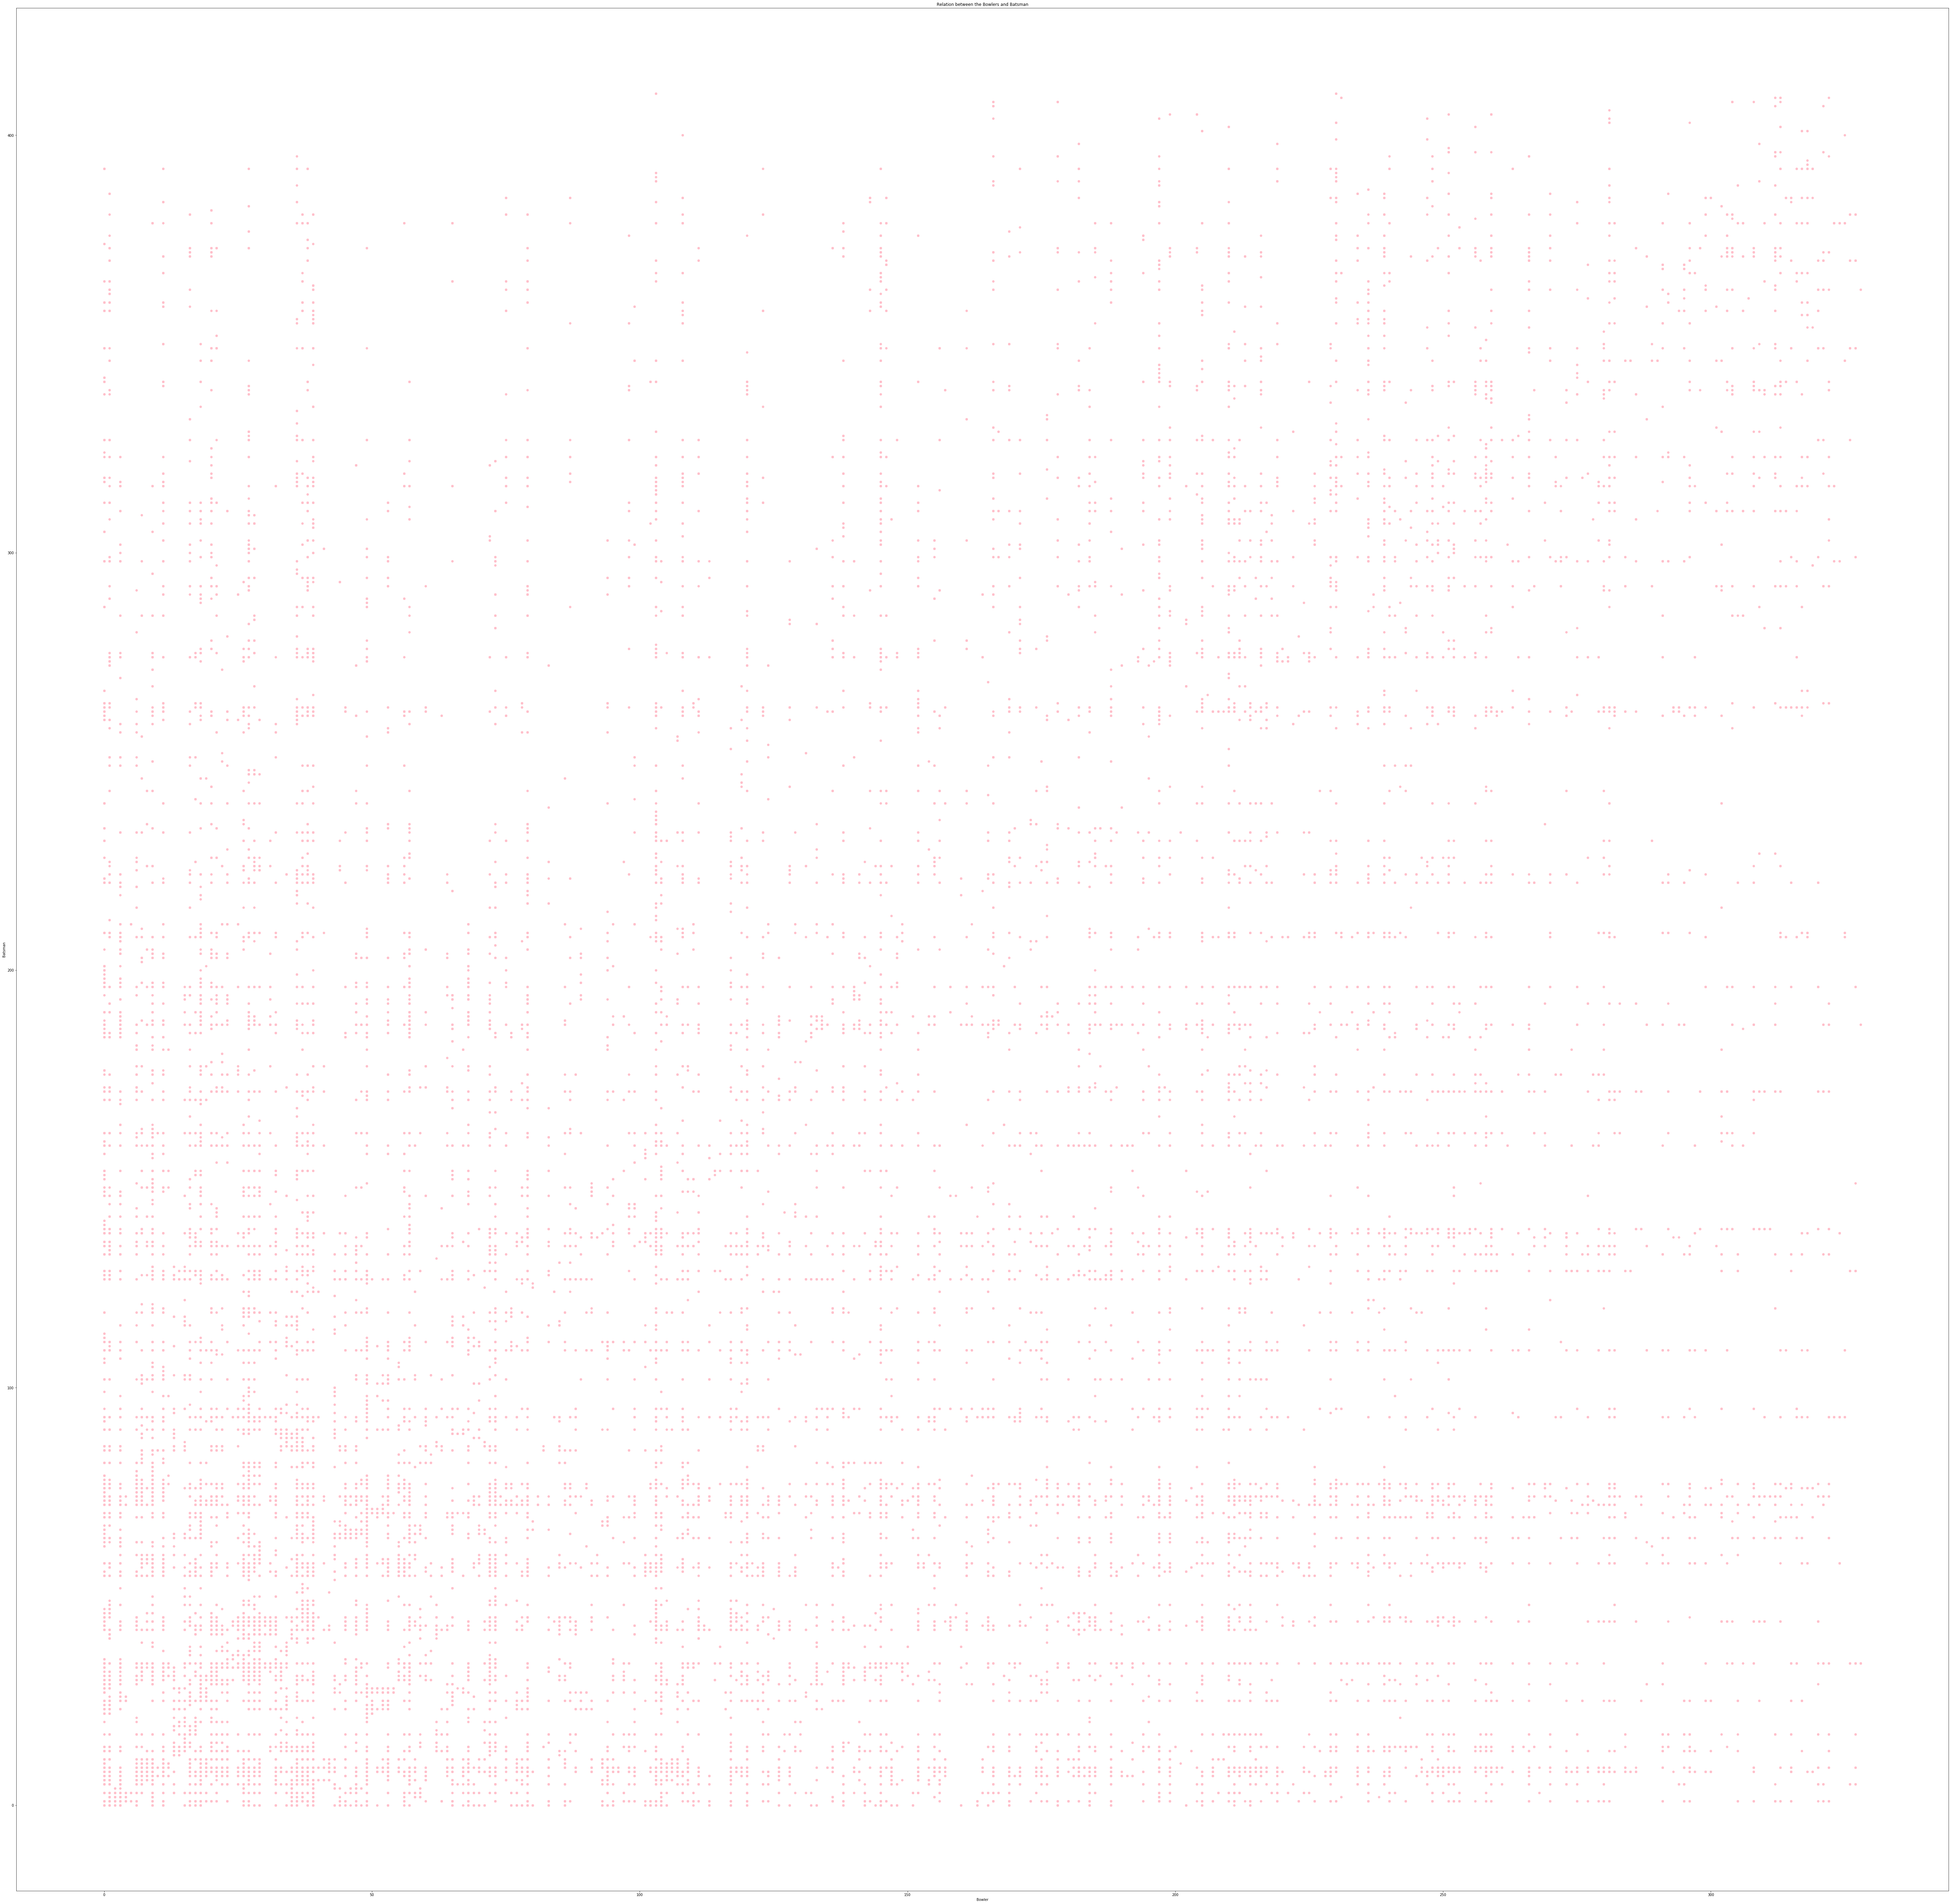

In [16]:
plt.figure(figsize=(100,100))
plt.scatter(dataset['bowler'],dataset['batsman'],color='pink')
plt.xlabel('Bowler')
plt.ylabel('Batsman')
plt.title('Relation between the Bowlers and Batsman')


Text(0.5, 1.0, 'Relation between Batting and Bowling teams')

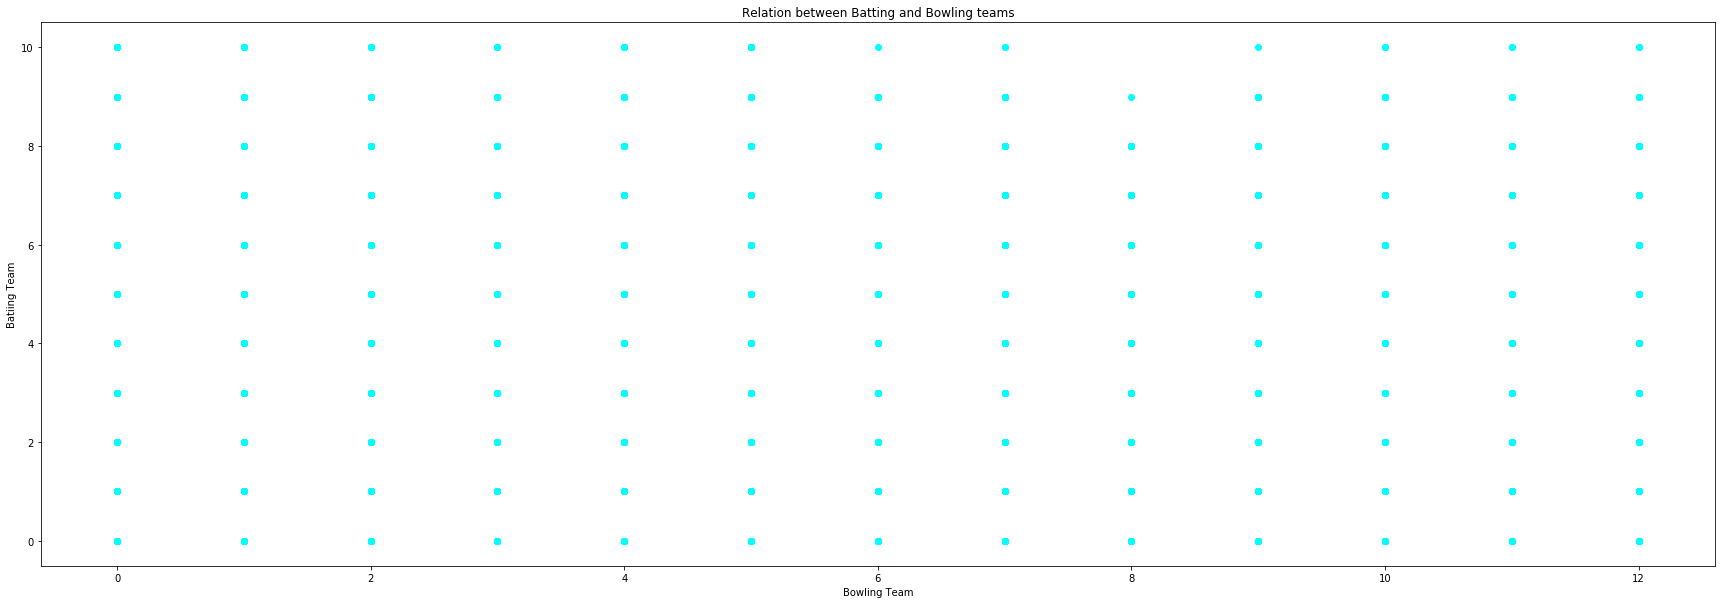

In [17]:
plt.figure(figsize=(30,10))
plt.scatter(dataset['bowl_team'],dataset['wickets'],color='cyan')
plt.xlabel('Bowling Team')
plt.ylabel('Batiing Team')
plt.title('Relation between Batting and Bowling teams')

Independant and dependant variable extraction, 
the last column total is left for model creation.

In [18]:
x=dataset.iloc[:,0:13]              
y=dataset.iloc[:,13]                

Splitting the model into test train and split. 

In [19]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

Importing the Random Forrest Regressor model and evaluation

In [20]:
from sklearn.ensemble import RandomForestRegressor
RFG = RandomForestRegressor(n_estimators=10, random_state=0)
RFG.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Prediction on the total column of the given dataset

In [21]:
y_predict=RFG.predict(x_test)
y_predict

array([166.8, 162.2, 141. , ..., 135. , 110.2, 180.2])

Checking the acuracy score on the test set in the given dataset

In [22]:
rsquare=metrics.r2_score(y_test, y_predict)
rsquare

0.9595430417433214

We have an accuracy of 95.95% 

Creating a new dataset and predicting the output with the above model

In [23]:
new_dataset=x_test.iloc[-1:] 
prediction=RFG.predict(new_dataset)
prediction

array([180.2])

From the above result , we have an error of 3%, with overall model accuracy of 97%.

As the acuuracy score cannot be predicted for single element array, its mannualy calculated. 